<h1>First stage evaluation with custom dataset</h1>

In [1]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\Shadow\anaconda3\envs\ldm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda:0


<h3>Loading model</h3>

In [5]:
#@title loading utils
import torch
from omegaconf import OmegaConf

from ldm.util import instantiate_from_config


def load_model_from_config(config, ckpt):
    print(f"Loading model from {ckpt}")
    pl_sd = torch.load(ckpt)#, map_location="cpu")
    sd = pl_sd["state_dict"]
    model = instantiate_from_config(config.model)
    m, u = model.load_state_dict(sd, strict=False)
    model.cuda()
    model.eval()
    return model


def get_model():
    config = OmegaConf.load("C:/Users/Shadow/Documents/ImSeqCond/latent-diffusion/models/first_stage_models/kl-f8/config.yaml")
    model = load_model_from_config(config, "C:/Users/Shadow/Documents/ImSeqCond/latent-diffusion/models/first_stage_models/kl-f8/model.ckpt")
    return model

In [6]:
from ldm.models.diffusion.ddim import DDIMSampler

model = get_model()

# print number of parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of parameters: {num_params}")

Loading model from C:/Users/Shadow/Documents/ImSeqCond/latent-diffusion/models/first_stage_models/kl-f8/model.ckpt
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips\vgg.pth
Number of parameters: 86419497


<h3>Loading data</h3>

In [7]:
from ldm.data.siar import SIAR

dataset = SIAR("C:/Users/Shadow/Documents/ImSeqCond/data/SIARmini", set_type='val', resolution=256)

Wrong images excluded


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'reconstructed')

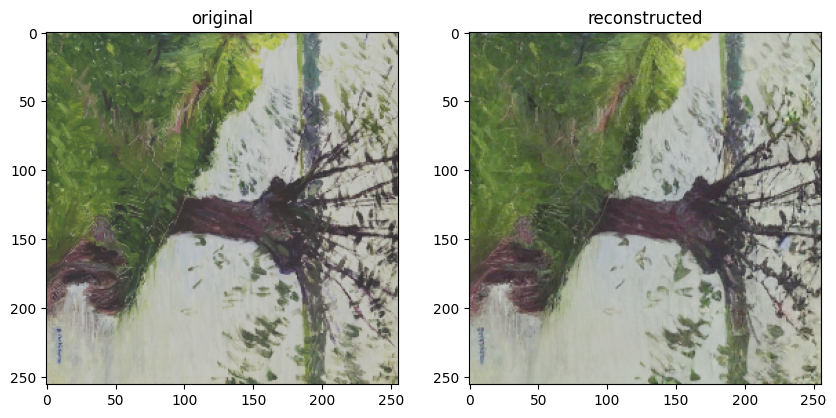

In [11]:
i = 17

data = torch.from_numpy(dataset[i]['data']).unsqueeze(0).permute(0, 3, 1, 2).to(device)

out = model(data)

recon = out[0].detach().cpu().permute(0, 2, 3, 1).numpy()

plot_original = (dataset[i]['data'] + 1) / 2
plot_out = (recon[0] + 1) / 2

# plot original and reconstructed image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(plot_original)
ax[0].set_title("original")
ax[1].imshow(plot_out)
ax[1].set_title("reconstructed")
